# Tarea - Caminata aleatoria y simulación montecarlo

Nombre: Israel Santiago Gomez

Fecha: 01/10/2023

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

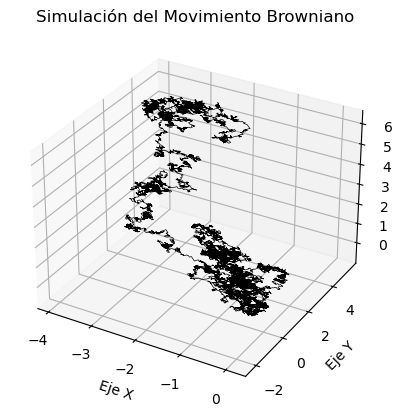

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

t_total = 10.0  
delta_t = 0.001 
num_pasos = int(t_total / delta_t)

x_positions = [0.0]
y_positions = [0.0]
z_positions = [0.0]

for i in range(0, num_pasos):
    delta_x = np.random.choice([-1, 1]) * np.sqrt(delta_t)
    delta_y = np.random.choice([-1, 1]) * np.sqrt(delta_t)
    delta_z = np.random.choice([-1, 1]) * np.sqrt(delta_t)
    
    new_x = x_positions[-1] + delta_x
    new_y = y_positions[-1] + delta_y
    new_z = z_positions[-1] + delta_z
    
    x_positions.append(new_x)
    y_positions.append(new_y)
    z_positions.append(new_z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_positions, y_positions, z_positions, lw = 0.5, color = "k")

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Simulación del Movimiento Browniano')

plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

**Punto 1**

In [5]:
import random

def juego():
    return random.choice([True, False])

def Apostador(C0):
    C = [C0]
    
    while C[-1] > 0:
        if C[-1] >= 6:
            apuesta = C[-1] / 2
        else:
            apuesta = 2
        
        gano = juego()
        
        if gano:
            C.append(C[-1] + apuesta)
        else:
            C.append(C[-1] - apuesta)
            
    return C


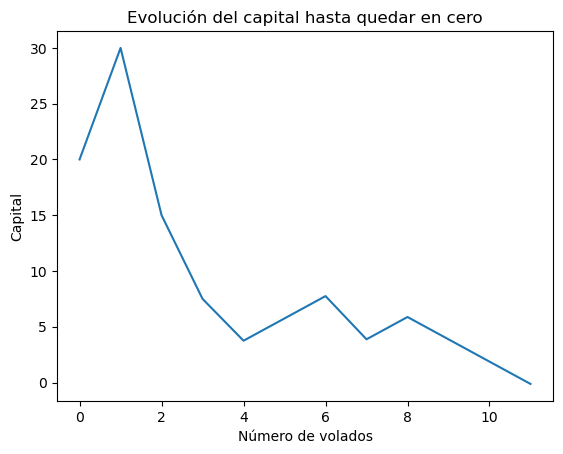

In [6]:
import matplotlib.pyplot as plt

C0 = 20
resultados = Apostador(C0)

plt.plot(resultados)
plt.xlabel("Número de volados")
plt.ylabel("Capital")
plt.title("Evolución del capital hasta quedar en cero")
plt.show()


**Punto 2**

In [10]:
def simulacion_montecarlo(num_apostadores, C0):
    resultados_finales = []
    num_volados_totales = []
    
    for i in range(num_apostadores):
        resultado = Apostador(C0)
        resultados_finales.append(resultado)
        num_volados = len(resultado) - 1
        num_volados_totales.append(num_volados)

    return num_volados_totales

num_volados_totales = simulacion_montecarlo(10000, 20)

num_volados_promedio = np.mean(num_volados_totales)

print("Número de volados promedio para quedar en quiebra:", num_volados_promedio)

Número de volados promedio para quedar en quiebra: 26.4518


**Punto 3**

(array([6.747e+03, 2.148e+03, 7.100e+02, 2.430e+02, 1.000e+02, 3.100e+01,
        1.200e+01, 4.000e+00, 2.000e+00, 3.000e+00]),
 array([  5. ,  28.1,  51.2,  74.3,  97.4, 120.5, 143.6, 166.7, 189.8,
        212.9, 236. ]),
 <BarContainer object of 10 artists>)

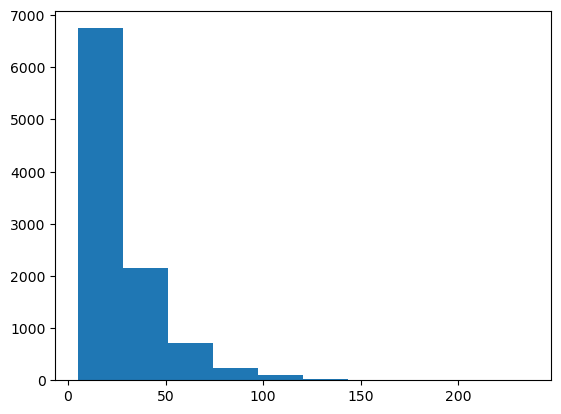

In [11]:
plt.hist(num_volados_totales)